# Integration of ZarrDataset with PyTorch's DataLoader

In [2]:
import zarrdataset as zds

from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

c:\Users\cervaf\Documents\Apps\miniconda3\envs\zds-pt\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# These are images from the Image Data Resource (IDR) 
# https://idr.openmicroscopy.org/ that are publicly available and were 
# converted to the OME-NGFF (Zarr) format by the OME group. More examples
# can be found at Public OME-Zarr data (Nov. 2020)
# https://www.openmicroscopy.org/2020/11/04/zarr-data.html

filenames = [
    "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0073A/9798462.zarr"
]

### Extracting patches of size 1024x1024 pixels from a Whole Slide Image (WSI)

Sample the image randomly

In [4]:
patch_size = dict(Y=768, X=1024)
patch_sampler = zds.BlueNoisePatchSampler(patch_size=patch_size)

Create a dataset from the list of filenames. All those files should be stored within their respective group "0".

Also, specify that the axes order in the image is Time-Channel-Depth-Height-Width (TCZYX), so the data can be handled correctly

In [5]:
my_dataset = zds.ZarrDataset(filenames,
                             data_group="0",
                             source_axes="TCZYX",
                             patch_sampler=patch_sampler,
                             shuffle=True,
                             return_any_label=False)

Create a DataLoader from the dataset object

In [6]:
my_dataloader = DataLoader(my_dataset, num_workers=0)

In [7]:
samples = []
for i, sample in enumerate(my_dataloader):
    # Samples generated by DataLoaders have Batch (B) as first axes
    samples.append(np.moveaxis(sample[0, 0, :, 0].numpy(), 0, -1))

    print(f"Sample {i+1} with size {sample.shape}")

    if i > 5:
        # Take only five samples for illustration purposes
        break

samples = np.hstack(samples)

Sample 1 with size torch.Size([1, 1, 3, 1, 768, 1024])
Sample 2 with size torch.Size([1, 1, 3, 1, 768, 1024])
Sample 3 with size torch.Size([1, 1, 3, 1, 768, 1024])
Sample 4 with size torch.Size([1, 1, 3, 1, 768, 1024])
Sample 5 with size torch.Size([1, 1, 3, 1, 768, 1024])
Sample 6 with size torch.Size([1, 1, 3, 1, 768, 1024])
Sample 7 with size torch.Size([1, 1, 3, 1, 768, 1024])


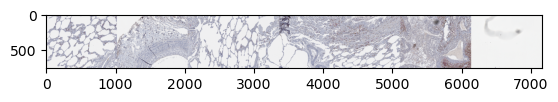

In [8]:
plt.imshow(samples)
plt.show()

### Multithread data loading

This example will use multiple workers to load patches of size 256x256 from the same image

In [9]:
patch_size = dict(Y=256, X=256)
patch_sampler = zds.BlueNoisePatchSampler(patch_size=patch_size)

Create a dataset from the list of filenames. All those files should be stored within their respective group "0".

Also, specify that the axes order in the image is Time-Channel-Depth-Height-Width (TCZYX), so the data can be handled correctly

In [10]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [15]:
my_dataset = zds.ZarrDataset(filenames,
                             data_group="3",
                             source_axes="TCZYX",
                             patch_sampler=patch_sampler,
                             shuffle=True,
                             return_any_label=False)

Create a DataLoader from the dataset object

In [17]:
my_dataloader = DataLoader(my_dataset, num_workers=4,
                           worker_init_fn=zds.zarrdataset_worker_init)

In [18]:
samples = []
for i, sample in enumerate(my_dataloader):
    # Samples generated by DataLoaders have Batch (B) as first axes
    samples.append(np.moveaxis(sample[0, 0, :, 0].numpy(), 0, -1))

    print(f"Sample {i+1} with size {sample.shape}")

    if i > 5:
        # Take only five samples for illustration purposes
        break

samples = np.hstack(samples)

Sample 1 with size torch.Size([1, 1, 3, 1, 256, 256])
Sample 2 with size torch.Size([1, 1, 3, 1, 256, 256])
Sample 3 with size torch.Size([1, 1, 3, 1, 256, 256])
Sample 4 with size torch.Size([1, 1, 3, 1, 256, 256])
Sample 5 with size torch.Size([1, 1, 3, 1, 256, 256])
Sample 6 with size torch.Size([1, 1, 3, 1, 256, 256])
Sample 7 with size torch.Size([1, 1, 3, 1, 256, 256])


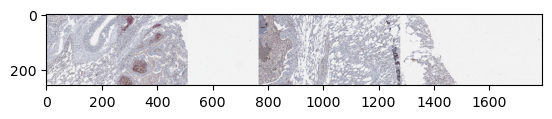

In [19]:
plt.imshow(samples)
plt.show()